In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [31]:
# Remember that wcword is different from word or token in usual sense! 
!man wc|grep -A 2 -B 1 "A word is"


     A word is defined as a string of characters delimited by white space
     characters.  White space characters are the set of characters for which
     the iswspace(3) function returns true.  If more than one input file is


# Load data

In [32]:
def load_lang_stat(stats_dir):
    df = pd.read_csv(Path(stats_dir)/'stats.tsv', sep='\t')
    df['crawl'] = str(stats_dir)
    return df

ldf = pd.concat((load_lang_stat(d) 
                 for d in Path('.').glob('*filtered_stats*')
                 if 'wide00006' not in str(d)
                ), ignore_index=True)
print(ldf.crawl.value_counts())
ldf

wide00017_filtered_stats    222
cc40_filtered_stats         217
wide00016_filtered_stats    215
wide00015_filtered_stats    215
Name: crawl, dtype: int64


,lang,text_newlines,text_wcwords,text_bytes,docs,crawl
0,aa,3250505,8852236,76219215,12463,wide00016_filtered_stats
1,ab,254938,994286,13899153,3344,wide00016_filtered_stats
2,af,1235247048,4978050138,38249795070,3492068,wide00016_filtered_stats
3,ak,1035647,3234934,23675326,3532,wide00016_filtered_stats
4,am,23777999,186774955,1889126108,102555,wide00016_filtered_stats
...,...,...,...,...,...,...
864,za,56632,255853,2796990,4561,wide00015_filtered_stats
865,zh,230152020157,223451577746,9225006225505,1041874081,wide00015_filtered_stats
866,zh-Hant,9077258585,14107453694,322804766627,35527741,wide00015_filtered_stats
867,zu,9331497,29452684,232608762,36393,wide00015_filtered_stats


In [33]:
linf = pd.read_csv('./_langs/code2name_cld2.tsv', sep='\t')
linf

,Code,Name
0,aa,afar
1,ab,abkhazian
2,af,afrikaans
3,ak,akan
4,am,amharic
...,...,...
165,za,zhuang
166,zh,chinese simplified
167,zh-Hant,chinese traditional
168,zu,zulu


In [34]:
ldf = ldf.merge(linf, how='left',left_on='lang',right_on='Code')
ldf[ldf['Name'].isnull()]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name
148,unk,710515876846,2409145924315,22509052692817,2536831841,wide00016_filtered_stats,NaN,NaN
157,xx-Avst,6878,15359,99660,62,wide00016_filtered_stats,NaN,NaN
158,xx-Bali,390,1849,16218,3,wide00016_filtered_stats,NaN,NaN
159,xx-Bamu,387411,459035,2657104,586,wide00016_filtered_stats,NaN,NaN
160,xx-Batk,2327,5242,31937,22,wide00016_filtered_stats,NaN,NaN
...,...,...,...,...,...,...,...,...
857,xx-Tfng,37200,102275,2066531,429,wide00015_filtered_stats,NaN,NaN
858,xx-Ugar,183,474,3426,1,wide00015_filtered_stats,NaN,NaN
859,xx-Vaii,4287,9472,87644,9,wide00015_filtered_stats,NaN,NaN
860,xx-Xsux,1684,2433,24042,2,wide00015_filtered_stats,NaN,NaN


In [35]:
ldf.sample(10)

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name
200,xx-Talu,7948,10777,134805,27,wide00016_filtered_stats,NaN,NaN
53,hu,23733651180,75425697200,621677757231,80501213,wide00016_filtered_stats,hu,hungarian
865,zh,230152020157,223451577746,9225006225505,1041874081,wide00015_filtered_stats,zh,chinese simplified
153,vo,30909086,96857147,733358904,51170,wide00016_filtered_stats,vo,volapuk
793,tl,99663517,792266193,4840918891,361422,wide00015_filtered_stats,tl,tagalog
728,ku,20776161,52260725,1439668336,115991,wide00015_filtered_stats,ku,kurdish
333,sg,418291,1386573,10878500,4965,cc40_filtered_stats,sg,sango
185,xx-Olck,19801,117595,1548109,146,wide00016_filtered_stats,NaN,NaN
158,xx-Bali,390,1849,16218,3,wide00016_filtered_stats,NaN,NaN
861,xx-Yiii,11403,11005,242905,61,wide00015_filtered_stats,NaN,NaN


In [36]:
def plot_langs(ldf, lang_col='lang-descr', stat_col='text_bytes', part_col='crawl', height=30, aspect=0.3, 
               logscale=True, xticks=[10**i for i in range(0,15)], fpath=None):
    my_plot=sns.catplot(kind='bar',data=ldf, y=lang_col, x=stat_col, hue=part_col,
                        palette='Set2',height=height, aspect=aspect, 
                        hue_order=None if part_col is None else sorted(ldf[part_col].unique()))
    if logscale:
        plt.xscale('log')
    plt.xlabel('')
    plt.ylabel('')

    sns.set_theme(font = 'monospace')
    # _=plt.xticks(rotation=90)
    _=plt.xticks(ticks=xticks)
    if fpath:
        my_plot.savefig(fpath)

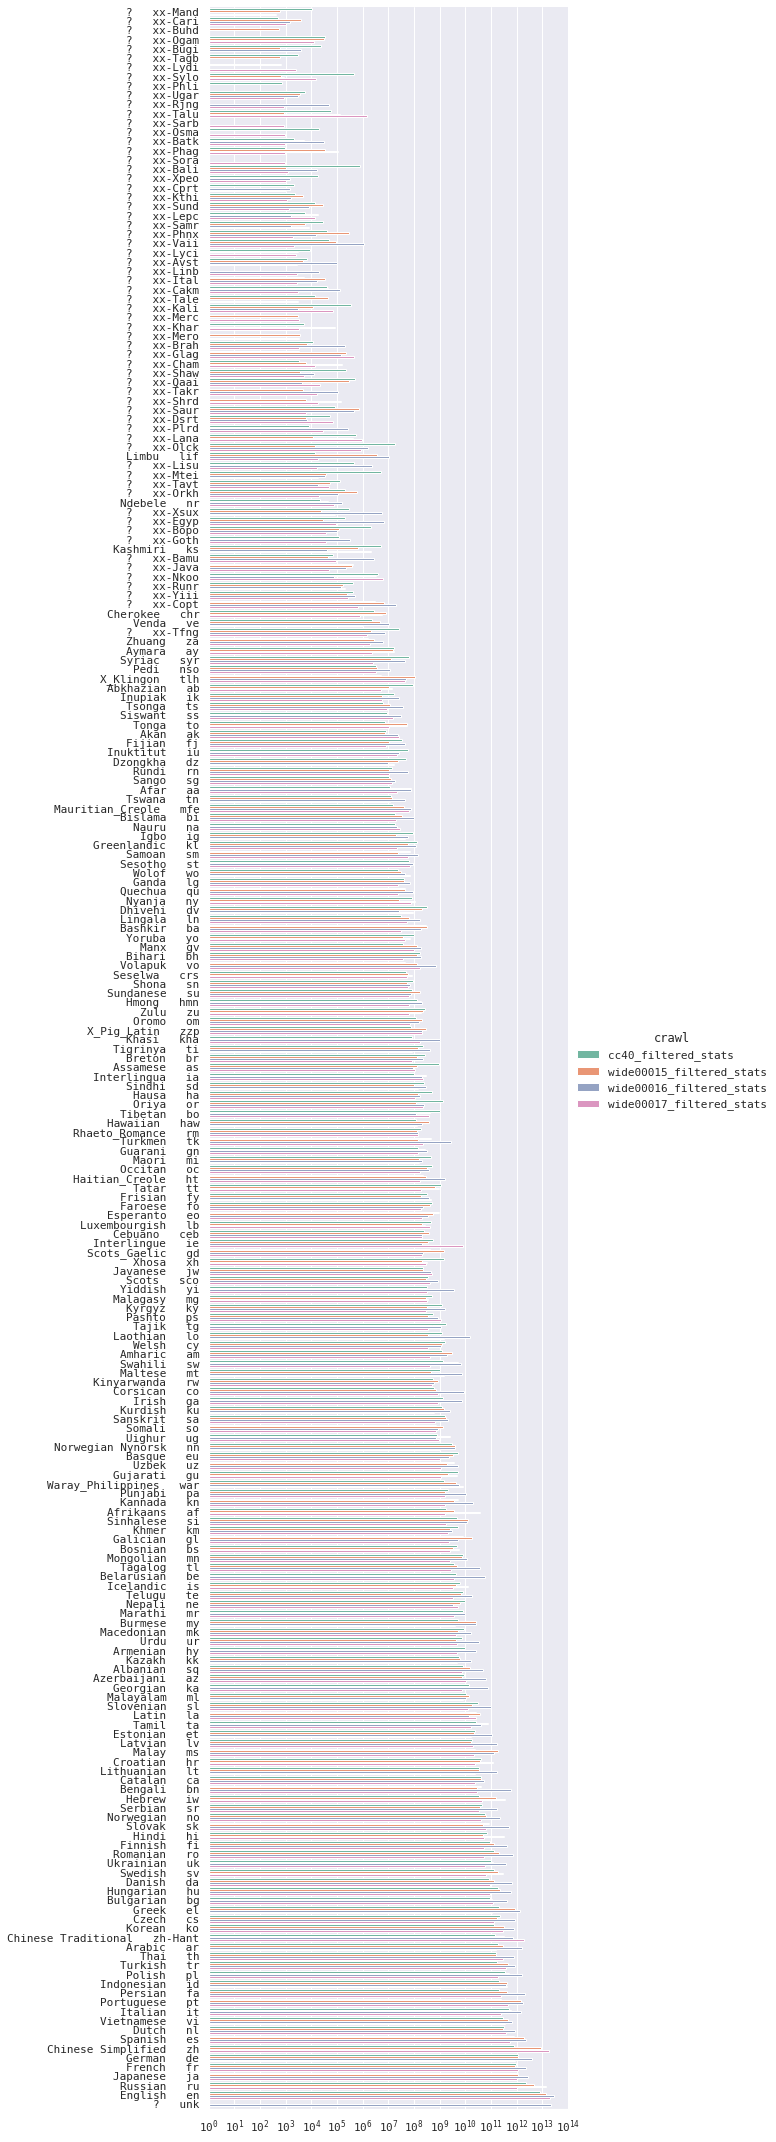

In [37]:
ldf['lang-descr'] = ldf.Name.fillna('?').str.title() + '   ' + ldf.lang
ldf=ldf.sort_values(by='text_bytes')    
plot_langs(ldf)

In [38]:
ldf['lang_props'] = ldf.groupby(['crawl'])['text_bytes'].transform(lambda r: r/r.sum())

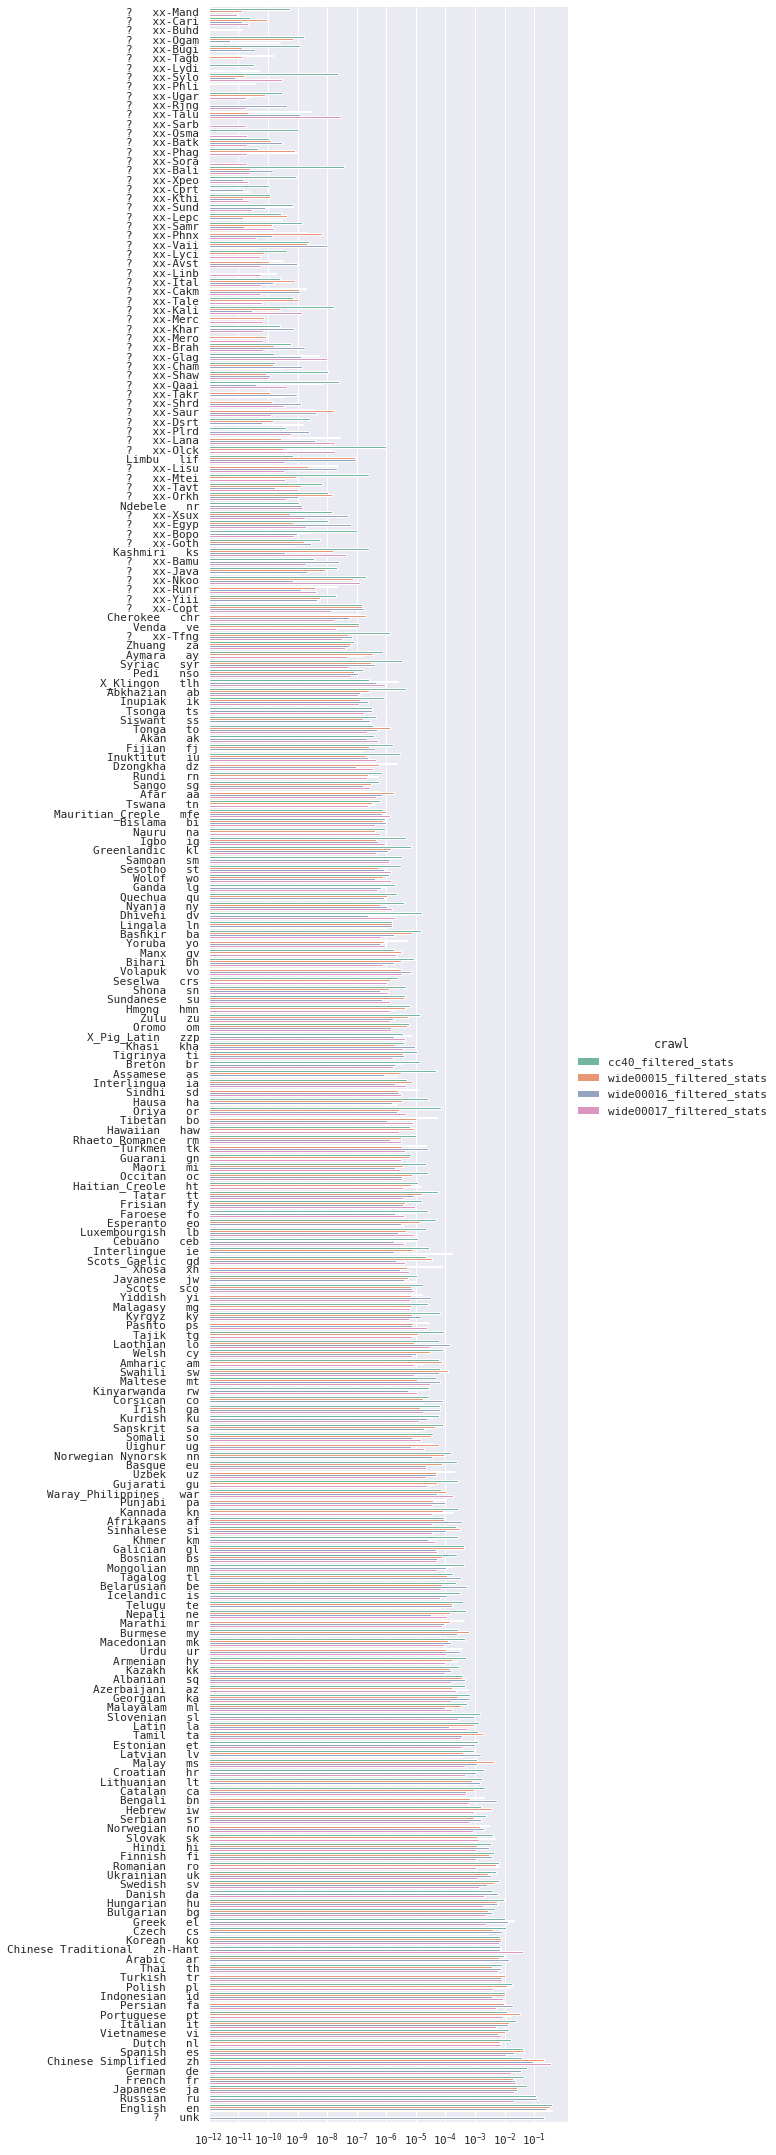

In [39]:
plot_langs(ldf, stat_col='lang_props', xticks=10.**np.arange(-12,0,))

# Plot languages listed in the project proposal

In [40]:
from pathlib import Path
lang2set = [(l,i) for i in range(1,6) for l in pd.read_csv(f'_langs/langs_{i}.txt', header=None)[0] ]

lang2set = pd.DataFrame(lang2set, columns=['lang','set'])
print(len(lang2set))
print(lang2set.set.value_counts())

77
5    31
3    22
4    19
2     4
1     1
Name: set, dtype: int64


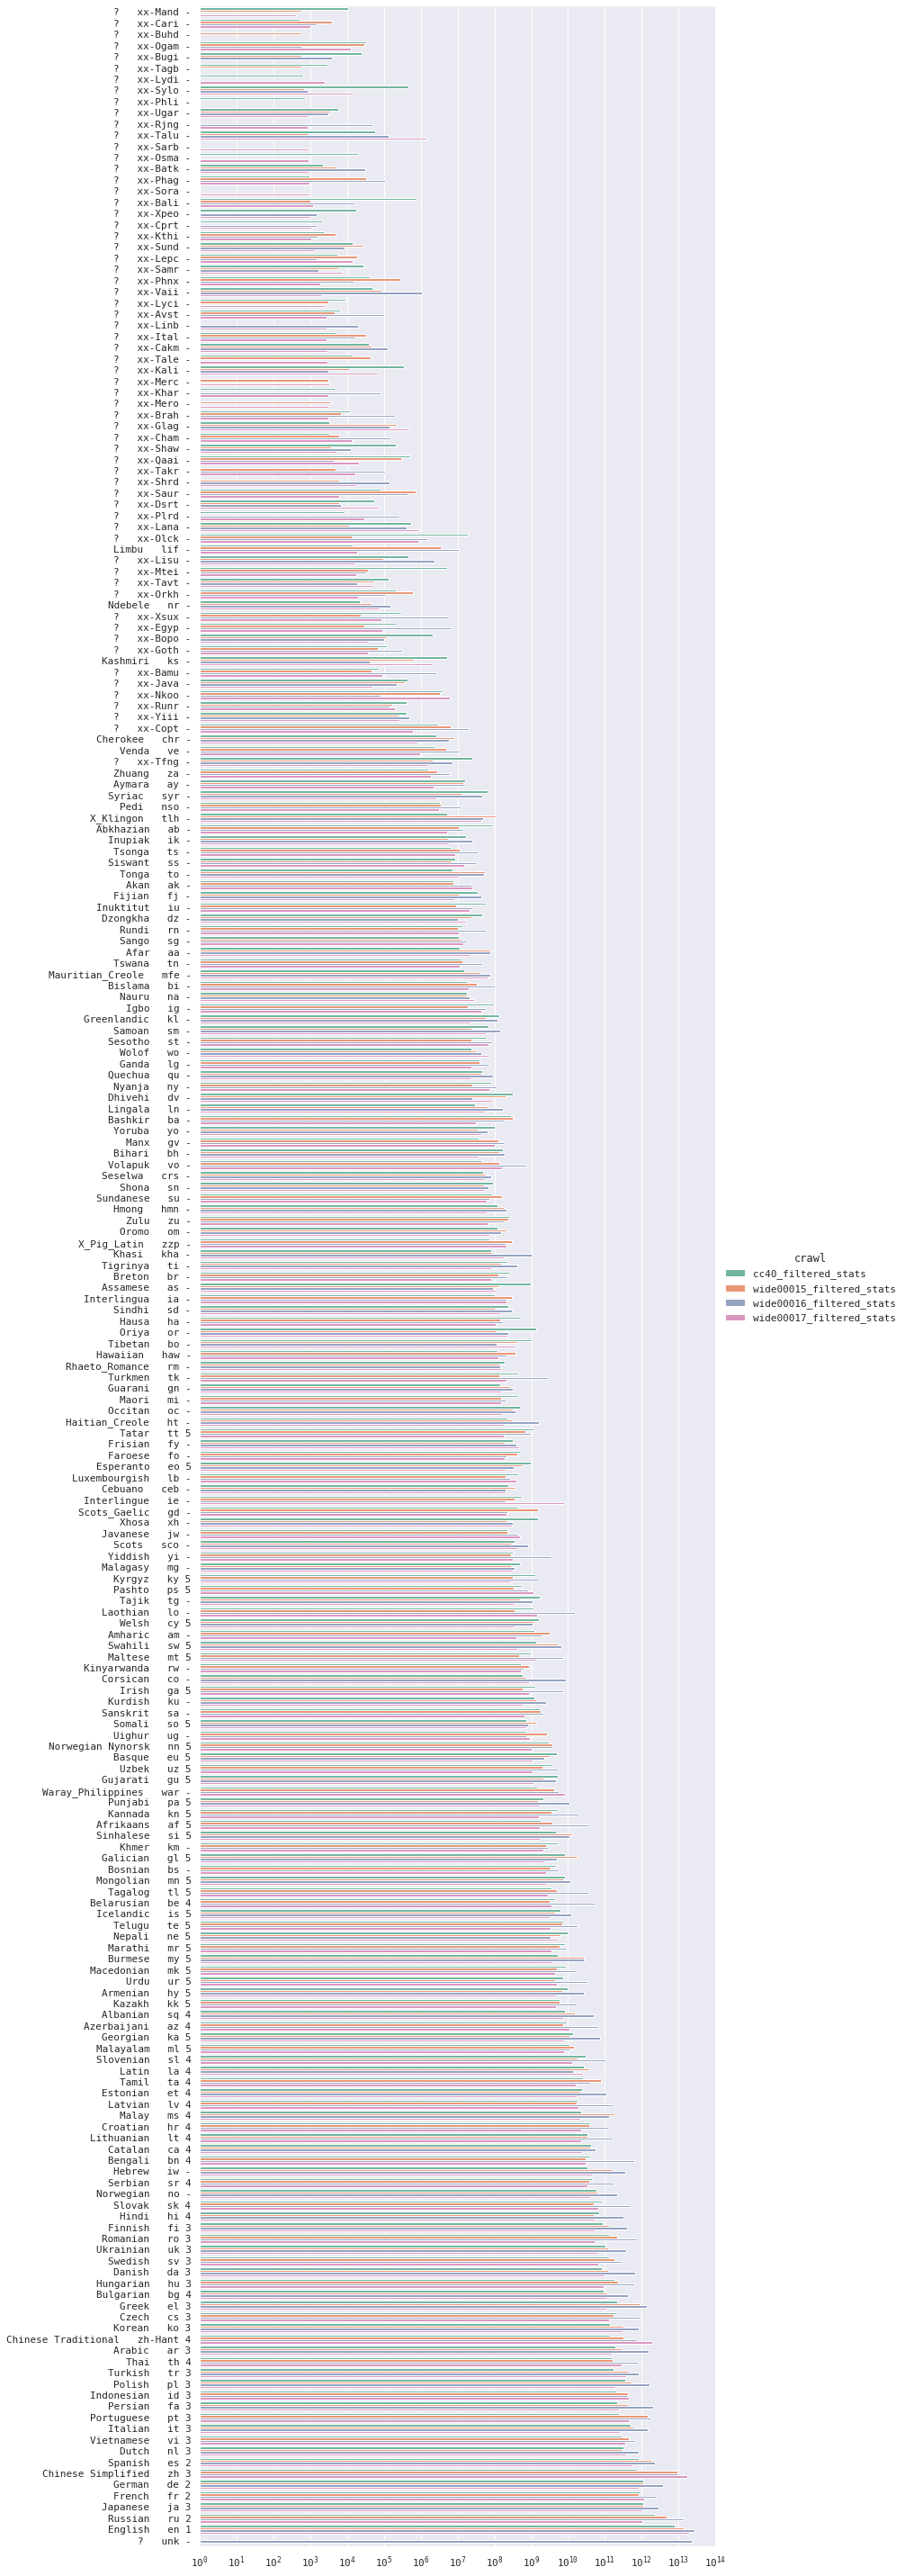

In [41]:
plot_df = ldf.merge(lang2set, on='lang', how='left')
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' + plot_df.set.apply(lambda r: '-' if pd.isna(r) else str(int(r)))
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=40)

In [42]:
# he stands for Hebrew
ldf[ldf.Name.str.contains('hebrew').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props
278,iw,560148949,908735542,32860518640,3539103,cc40_filtered_stats,iw,hebrew,Hebrew iw,0.001657
495,iw,1081227042,4744613631,46131686574,5463218,wide00017_filtered_stats,iw,hebrew,Hebrew iw,0.000961
717,iw,2911599978,2319585281,161465723731,8216811,wide00015_filtered_stats,iw,hebrew,Hebrew iw,0.003849
63,iw,10445562664,38215342037,364024775061,29552732,wide00016_filtered_stats,iw,hebrew,Hebrew iw,0.003375


In [43]:
# nb stands for Norwegian (Bokmål)
ldf[ldf.Name.str.contains('norwegian').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props
529,nn,39401284,150905235,1025643543,246884,wide00017_filtered_stats,nn,norwegian nynorsk,Norwegian Nynorsk nn,0.000021
312,nn,109918286,402991230,2995985345,581065,cc40_filtered_stats,nn,norwegian nynorsk,Norwegian Nynorsk nn,0.000151
751,nn,124496044,554072045,3768153257,533375,wide00015_filtered_stats,nn,norwegian nynorsk,Norwegian Nynorsk nn,0.000090
97,nn,125251197,507328809,3903872881,495188,wide00016_filtered_stats,nn,norwegian nynorsk,Norwegian Nynorsk nn,0.000036
530,no,1727627833,5841600717,40073256568,6348935,wide00017_filtered_stats,no,norwegian,Norwegian no,0.000835
313,no,1646643214,8416419570,57997268232,9891840,cc40_filtered_stats,no,norwegian,Norwegian no,0.002925
752,no,2020019858,9746251443,63442991936,8735018,wide00015_filtered_stats,no,norwegian,Norwegian no,0.001512
98,no,9764735544,31041102563,219090177895,36928686,wide00016_filtered_stats,no,norwegian,Norwegian no,0.002031


In [44]:
lang2set = lang2set.replace({'he':'iw', 'nb':'no'})

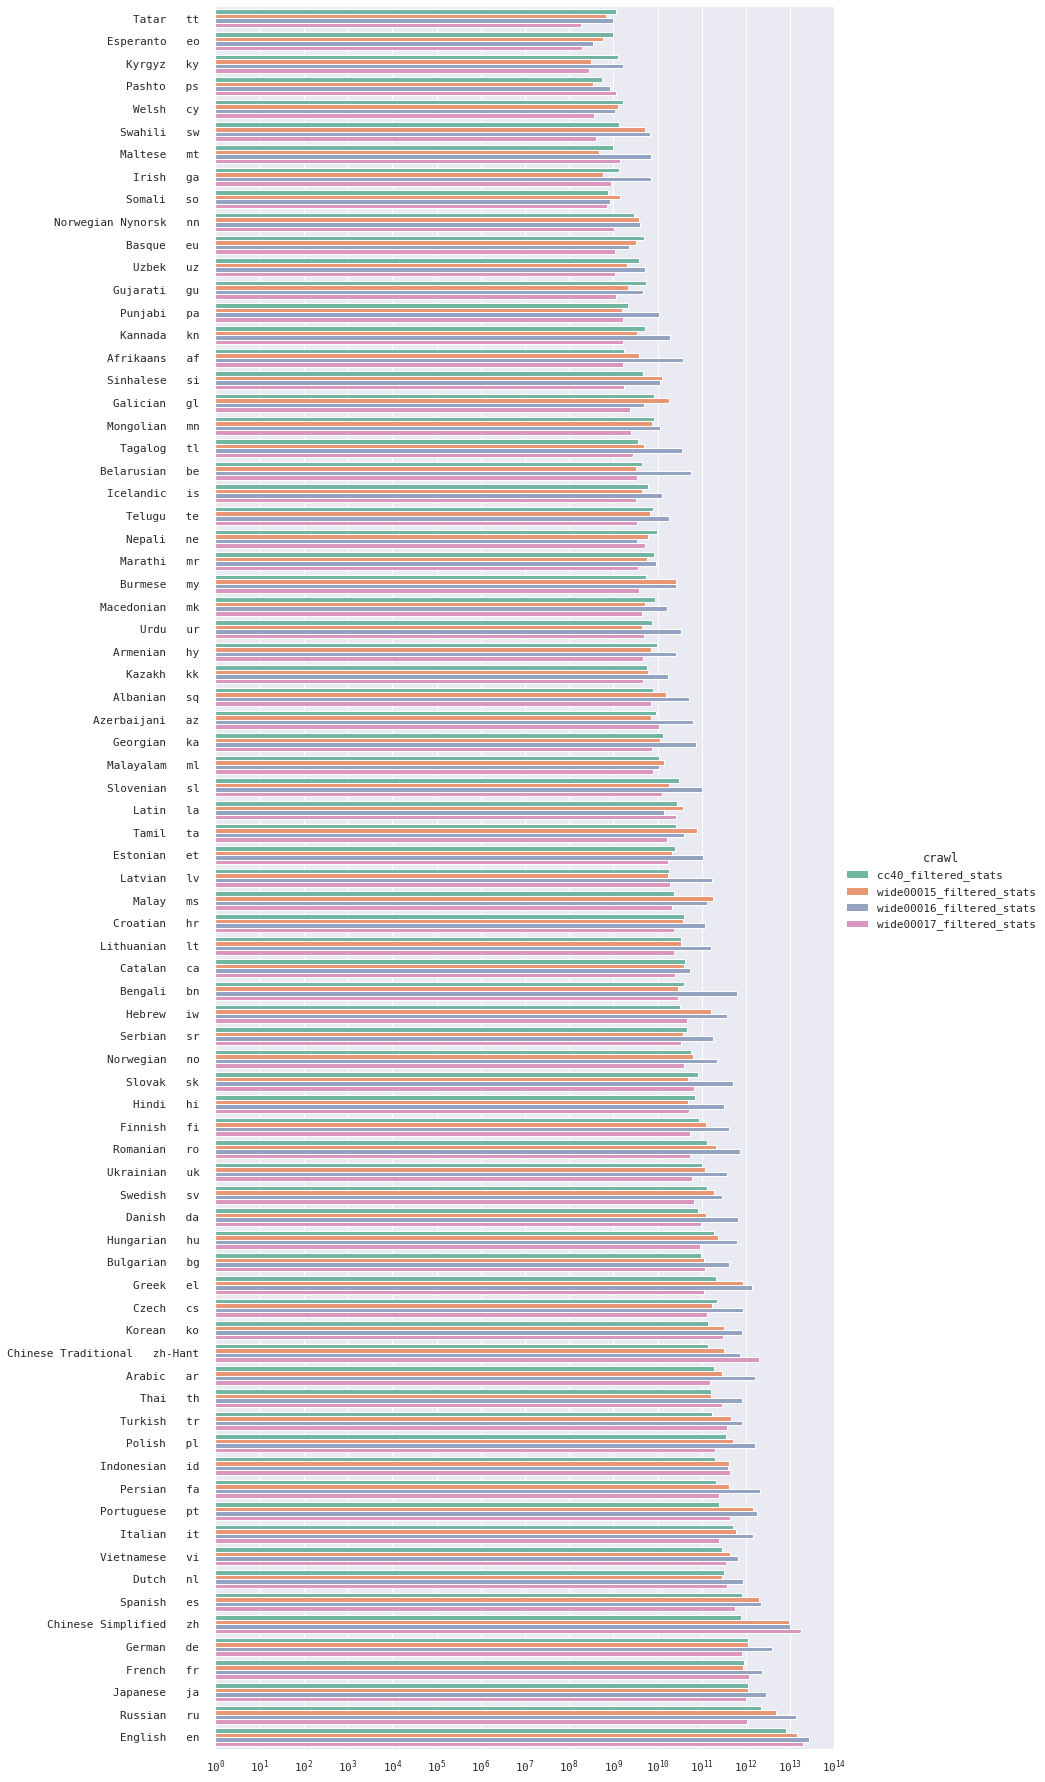

In [45]:
plot_df = ldf.merge(lang2set, on='lang', how='right')
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' #+ plot_df.set.astype(str)
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=25, aspect=0.5)

In [46]:
gdf = plot_df.groupby('lang').agg('sum').drop(columns=['set'])
gdf.describe()

,text_newlines,text_wcwords,text_bytes,docs,lang_props
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,77.000000
mean,7.016326e+10,2.682942e+11,2.531765e+12,3.780818e+08,0.049187
std,2.692870e+11,1.179795e+12,9.106462e+12,1.624008e+09,0.180787
min,5.147699e+07,1.674745e+08,2.084574e+09,3.136270e+05,0.000066
25%,5.370593e+08,1.936552e+09,3.012477e+10,2.509536e+06,0.000699
50%,6.302614e+09,2.423771e+10,1.711114e+11,2.131001e+07,0.003821
75%,4.011366e+10,1.391465e+11,1.394962e+12,1.385369e+08,0.025787
max,2.198404e+12,1.018825e+13,6.843174e+13,1.276065e+10,1.387082


In [47]:
langs1=gdf.sort_values(by='text_bytes').head(40).index.to_list()
langs2=gdf.sort_values(by='text_bytes').tail(len(gdf)-40).index.to_list()

In [48]:
plot_df[plot_df['lang-descr'].str.contains('Pashto')]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props,set
272,ps,4144873,7236861,338033952,34590,wide00015_filtered_stats,ps,pashto,Pashto ps,0.000008,5
273,ps,9261914,10871344,539012433,71332,cc40_filtered_stats,ps,pashto,Pashto ps,0.000027,5
274,ps,16686011,111187745,822885289,87615,wide00016_filtered_stats,ps,pashto,Pashto ps,0.000008,5
275,ps,30165791,139781104,1117237639,120090,wide00017_filtered_stats,ps,pashto,Pashto ps,0.000023,5


# Build Table 4.2 from the report

In [50]:
q=plot_df.groupby('lang-descr').agg('sum').drop(columns=['set', 'lang_props']).sort_values(by='text_bytes')#.drop(columns=['lang','Name','Code','crawl'])
lang_order = list(q.index)
q.loc['Total'] = q.sum(numeric_only=True)
q=q*1.0
q.to_csv('qwer.csv', float_format="%.2e", sep='\t')
!cat qwer.csv

lang-descr	text_newlines	text_wcwords	text_bytes	docs
Esperanto   eo 	5.54e+07	2.91e+08	2.08e+09	4.01e+05
Pashto   ps 	6.03e+07	2.69e+08	2.82e+09	3.14e+05
Tatar   tt 	6.40e+07	1.67e+08	2.98e+09	3.70e+05
Kyrgyz   ky 	5.15e+07	1.81e+08	3.49e+09	3.45e+05
Somali   so 	8.02e+07	5.40e+08	3.65e+09	6.78e+05
Welsh   cy 	1.33e+08	6.20e+08	4.29e+09	7.35e+05
Irish   ga 	3.56e+08	1.43e+09	1.00e+10	2.73e+06
Maltese   mt 	3.61e+08	1.39e+09	1.01e+10	9.31e+05
Basque   eu 	3.38e+08	1.51e+09	1.15e+10	2.29e+06
Norwegian Nynorsk   nn 	3.99e+08	1.62e+09	1.17e+10	1.86e+06
Uzbek   uz 	2.18e+08	9.25e+08	1.21e+10	1.37e+06
Gujarati   gu 	2.28e+08	7.41e+08	1.33e+10	9.28e+05
Swahili   sw 	3.72e+08	2.07e+09	1.37e+10	2.20e+06
Punjabi   pa 	3.28e+08	1.14e+09	1.61e+10	2.41e+06
Nepali   ne 	2.63e+08	9.32e+08	2.44e+10	2.12e+06
Icelandic   is 	9.11e+08	3.41e+09	2.62e+10	3.87e+06
Marathi   mr 	3.56e+08	1.31e+09	2.71e+10	1.64e+06
Mongolian   mn 	4.89e+08	1.59e+09	2.93e+10	2.51e+06
Kannada   kn 	7.59e+08	1.79e+09	2.96e+10	1

In [51]:
 plot_df.sort_values(by='lang-descr', key=lambda column: column.map(lambda e: lang_order.index(e)), inplace=True)

In [52]:
plot_df.drop(columns=['set']).groupby('crawl').describe().transpose()

crawl                cc40_filtered_stats  wide00015_filtered_stats  \
text_newlines count         7.700000e+01              7.700000e+01   
              mean          6.049031e+09              1.389784e+10   
              std           2.424182e+10              5.313784e+10   
              min           9.261914e+06              4.144873e+06   
              25%           9.406427e+07              9.307564e+07   
              50%           6.156575e+08              7.026303e+08   
              75%           3.722365e+09              5.740533e+09   
              max           2.076352e+11              4.016597e+11   
text_wcwords  count         7.700000e+01              7.700000e+01   
              mean          2.841704e+10              5.349033e+10   
              std           1.376672e+11              2.541270e+11   
              min           1.087134e+07              6.509550e+06   
              25%           2.177042e+08              2.660567e+08   
              50%           2.332775e+09              2.552436e+09   
              75%           1.108946e+10              2.335119e+10   
              max           1.195445e+12              2.201022e+12   
text_bytes    count         7.700000e+01              7.700000e+01   
              mean          2.570741e+11              5.443446e+11   
              std           9.463076e+11              1.972137e+12   
              min           5.390124e+08              3.131111e+08   
              25%           5.357566e+09              5.097426e+09   
              50%           2.702866e+10              3.308399e+10   
              75%           1.594368e+11              2.317787e+11   
              max           7.904782e+12              1.410263e+13   
docs          count         7.700000e+01              7.700000e+01   
              mean          3.640442e+07              6.648312e+07   
              std           1.513637e+08              2.799051e+08   
              min           7.133200e+04              3.459000e+04   
              25%           5.810650e+05              4.135710e+05   
              50%           3.539103e+06              2.670062e+06   
              75%           1.925805e+07              2.599131e+07   
              max           1.303529e+09              2.213464e+09   
lang_props    count         7.700000e+01              7.700000e+01   
              mean          1.296378e-02              1.297708e-02   
              std           4.772057e-02              4.701539e-02   
              min           2.718142e-05              7.464512e-06   
              25%           2.701723e-04              1.215217e-04   
              50%           1.363006e-03              7.887162e-04   
              75%           8.040107e-03              5.525562e-03   
              max           3.986238e-01              3.362041e-01   

crawl                wide00016_filtered_stats  wide00017_filtered_stats  
text_newlines count              7.700000e+01              7.700000e+01  
              mean               3.499628e+10              1.522011e+10  
              std                1.234988e+11              7.336471e+10  
              min                1.099749e+07              4.469660e+06  
              25%                2.775663e+08              5.248397e+07  
              50%                4.179525e+09              6.269566e+08  
              75%                2.373365e+10              3.468564e+09  
              max                1.013690e+12              5.754183e+11  
text_wcwords  count              7.700000e+01              7.700000e+01  
              mean               1.254611e+11              6.092575e+10  
              std                4.734686e+11              3.293431e+11  
              min                5.046092e+07              1.764887e+07  
              25%                1.023944e+09              2.493541e+08  
              50%                1.415402e+10              2.424826e+09  
              75%  

Text(0.5, 1.0, 'Raw text size for languages listed in the proposal')

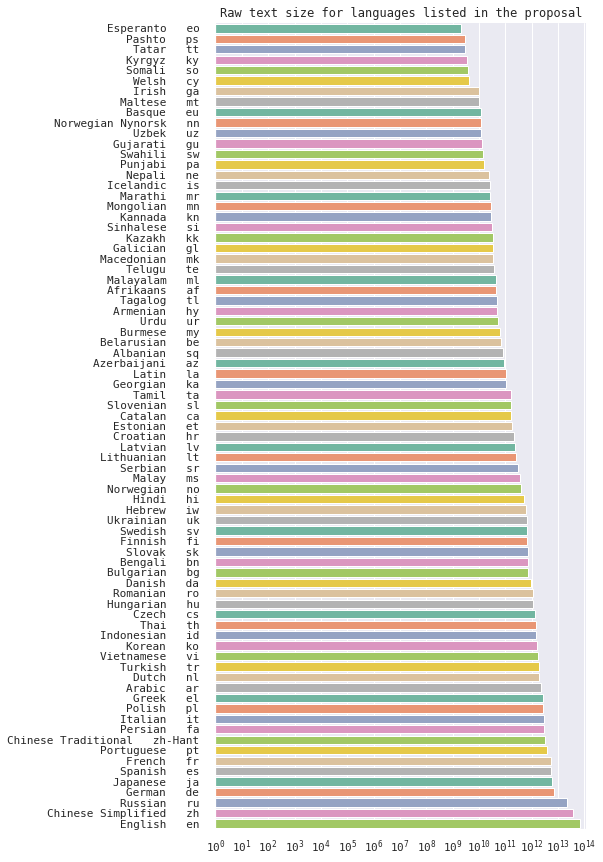

In [53]:
sum_plot_df = plot_df.groupby(['lang','lang-descr']).agg('sum').reset_index().sort_values(by='text_bytes')
plot_langs(sum_plot_df, part_col=None, height=12, aspect=0.7)
plt.title('Raw text size for languages listed in the proposal')

In [54]:
plot_df.columns

Index(['lang', 'text_newlines', 'text_wcwords', 'text_bytes', 'docs', 'crawl',
       'Code', 'Name', 'lang-descr', 'lang_props', 'set'],
      dtype='object')

In [55]:
for c in ['text_newlines', 'text_wcwords', 'text_bytes', 'docs']:
    plot_df[c+'_prop'] = plot_df.groupby(['lang','lang-descr'])[c].transform(lambda r: r/r.sum())


In [56]:
ldf.groupby('crawl')['text_bytes'].agg('sum') / 2**40

crawl
cc40_filtered_stats         18.035444
wide00015_filtered_stats    38.150236
wide00016_filtered_stats    98.092500
wide00017_filtered_stats    43.648797
Name: text_bytes, dtype: float64

In [57]:
plot_df.groupby('crawl')['text_wcwords'].agg('sum') / 2**40

crawl
cc40_filtered_stats         1.990076
wide00015_filtered_stats    3.745987
wide00016_filtered_stats    8.786178
wide00017_filtered_stats    4.266697
Name: text_wcwords, dtype: float64

In [58]:
plot_df.crawl.str.replace('.*filter_stats','', regex=True)

192    wide00017_filtered_stats
195         cc40_filtered_stats
193    wide00016_filtered_stats
194    wide00015_filtered_stats
275    wide00017_filtered_stats
                 ...           
107    wide00017_filtered_stats
0           cc40_filtered_stats
2      wide00017_filtered_stats
1      wide00015_filtered_stats
3      wide00016_filtered_stats
Name: crawl, Length: 308, dtype: object

In [59]:
plot_df.groupby('crawl').sum() 

,text_newlines,text_wcwords,text_bytes,docs,lang_props,set,text_newlines_prop,text_wcwords_prop,text_bytes_prop,docs_prop
crawl,,,,,,,,,,
cc40_filtered_stats,465775385639,2188111854553,19794708074401,2803140170,0.998211,306,11.101305,9.833747,13.079032,15.192304
wide00015_filtered_stats,1070133570666,4118755714384,41914531038119,5119199904,0.999235,306,13.743877,13.141922,15.677224,13.297991
wide00016_filtered_stats,2694713547320,9660504416000,85278570810440,10832970792,0.790686,306,42.714994,43.264985,38.546167,37.492695
wide00017_filtered_stats,1171948183481,4691282963049,47958076657507,10356987225,0.999286,306,9.439823,10.759345,9.697577,11.017010


Text(78.2976041666667, 0.5, '')

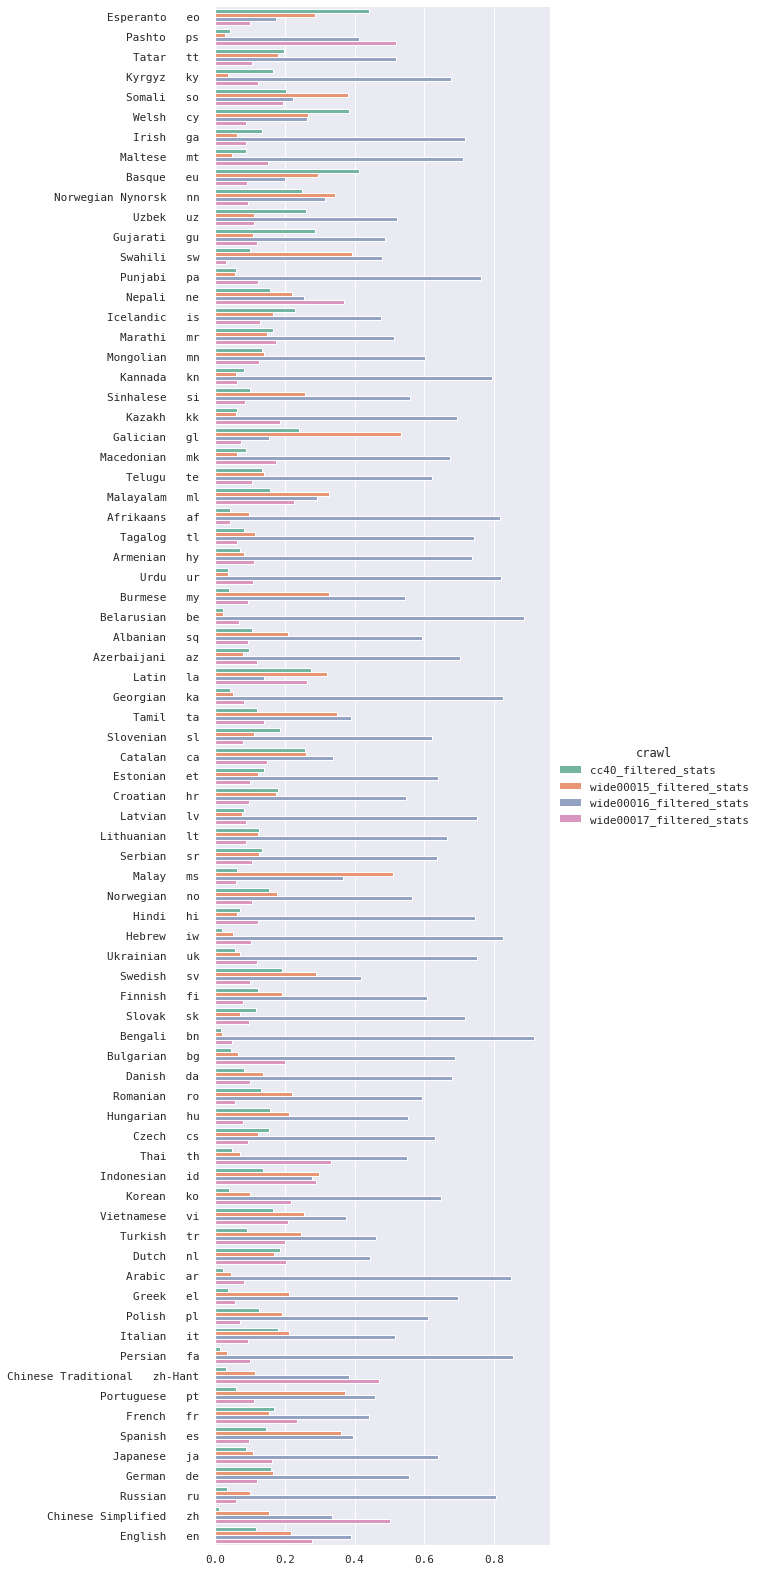

In [60]:
sns.set_context('notebook')
plot_langs(plot_df,stat_col='text_wcwords_prop', height=22, aspect=0.4, 
           logscale=False,xticks=None)
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

Text(3.1999999999999886, 0.5, '')

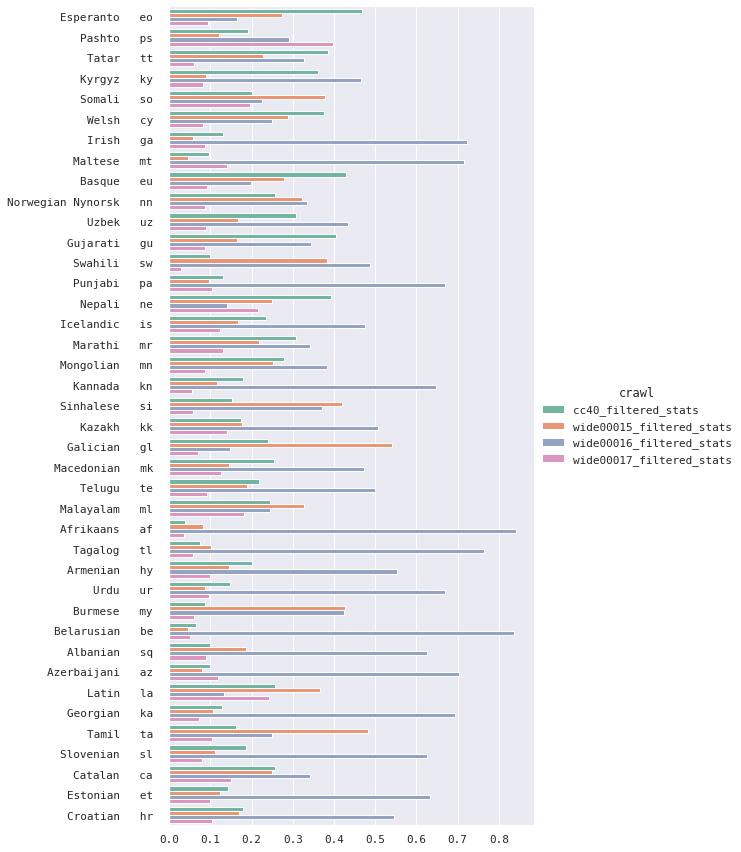

In [61]:
sns.set_context('notebook')
plot_langs(plot_df[plot_df.lang.isin(langs1)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
           logscale=False,xticks=None, fpath='text_bytes_prop1.pdf')
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

Text(3.1999999999999886, 0.5, '')

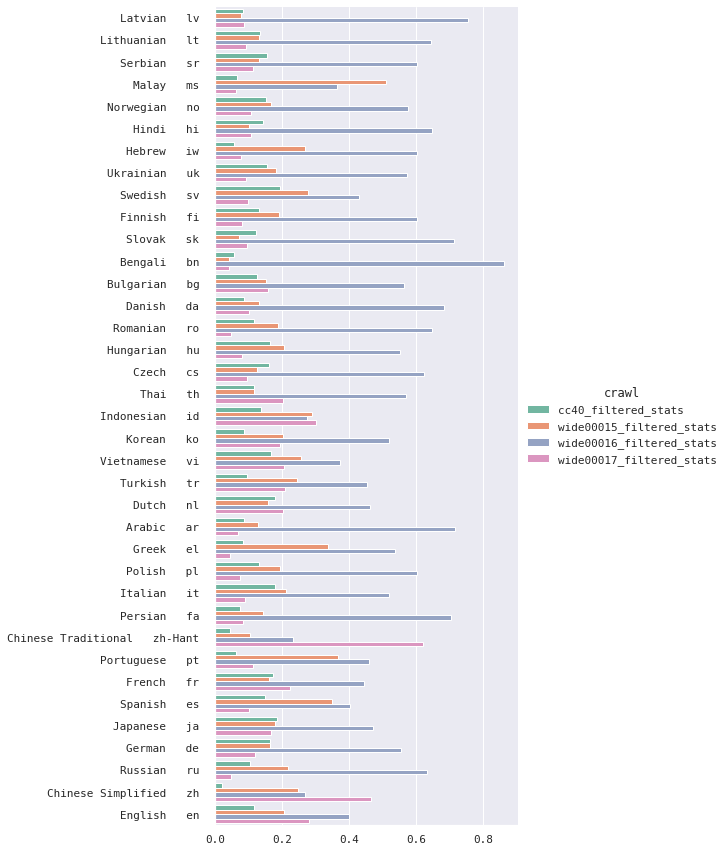

In [62]:
sns.set_context('notebook')
plot_langs(plot_df[plot_df.lang.isin(langs2)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
           logscale=False,xticks=None, fpath='text_bytes_prop2.pdf')
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')